# segmentor2.py

## training

In [1]:
import leopardgecko.segmentor2 as lgs2
import numpy as np

In [2]:
import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
        )
import tifffile

In [3]:
data_labels_fn=[
    ("./test_data/TS_0005_crop.tif", "./test_data/TS_0005_ribos_membr_crop.tif"),
]

traindatas=[]
trainlabels=[]

for datafn0, labelfn0 in data_labels_fn:
     #Make sure data and labels are curated in the correct data format
    traindatas.append(tifffile.imread(datafn0))
    trainlabels.append(tifffile.imread(labelfn0)) #In this case labels are already in uint8

In [4]:
#lgs2.quick_new_and_train_one_unet_model_per_axis(traindatas, trainlabels)

lgs2.quick_new_and_train_2unets_z_xy_models(traindatas, trainlabels)

2024-06-20 17:35:28,148 — root — INFO — quick_new_and_train_2unets_z_xy_models:1403 — quick_new_and_train_one_unet_model_per_axis
2024-06-20 17:35:28,149 — root — INFO — update_nn1_models_from_generators:178 — update_NN1_models_from_generators()
2024-06-20 17:35:28,150 — root — INFO — update_nn1_models_from_generators:183 — 2 NN1 models to be created
2024-06-20 17:35:28,151 — root — INFO — create_nn1_ptmodel_from_class_generator:129 — create_nn1_ptmodel_from_class_generator()
2024-06-20 17:35:28,890 — root — INFO — create_nn1_ptmodel_from_class_generator:129 — create_nn1_ptmodel_from_class_generator()
2024-06-20 17:35:29,503 — root — INFO — update_nn2_model_from_generator:978 — update_NN2_model_from_generator()
2024-06-20 17:35:29,504 — root — INFO — create_nn2_ptmodel_from_class_generator:945 — create_nn2_ptmodel_from_class_generator()
2024-06-20 17:35:29,505 — root — INFO — create_nn2_ptmodel_from_class_generator:953 — hid_layers_num_list: [10, 10]
2024-06-20 17:35:29,508 — root — IN

Save model

In [5]:
import datetime
DATE=str(datetime.date.today())
TIME=f"{datetime.datetime.now().hour:02d}{datetime.datetime.now().minute:02d}"
fname_stem=f"{DATE}_{TIME}"
model_fn = f"{fname_stem}_model.lgsegm2"
model_fn

'2024-06-20_1744_model.lgsegm2'

In [6]:
lgs2.save_lgsegm2_model(model_fn)

## see training progress

In [7]:
lgs2.last_train_nn1_progress

{0: {'test_results': [{'avg_loss': 0.5908565773413732,
    'avg_metric': 0.06856361174836266,
    'test_metrics': [0.13292181491851807,
     0.08681941777467728,
     0.050394587218761444,
     0.14872510731220245,
     0.1250348836183548,
     0.08280450105667114,
     0.07976945489645004,
     0.06081351637840271,
     0.04971941560506821,
     0.07749702781438828,
     1.0834471340925855e-12,
     0.14546911418437958,
     0.07549350708723068,
     1.4726673656581535e-12,
     0.11975574493408203,
     0.002731907181441784,
     0.06992422789335251,
     0.08396823704242706,
     0.09938324242830276,
     1.1343399093297069e-12,
     0.0022652791813015938,
     0.08822916448116302,
     0.06130973994731903,
     0.08588214218616486,
     0.05374187231063843,
     2.4411082964054254e-12],
    'test_losses': [0.6749149560928345,
     0.7286227941513062,
     0.7502028942108154,
     0.7040740847587585,
     0.6292266845703125,
     0.6300694942474365,
     0.7032686471939087,
     0.7

In [15]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v)

0 {'test_results': [{'avg_loss': 0.5908565773413732, 'avg_metric': 0.06856361174836266, 'test_metrics': [0.13292181491851807, 0.08681941777467728, 0.050394587218761444, 0.14872510731220245, 0.1250348836183548, 0.08280450105667114, 0.07976945489645004, 0.06081351637840271, 0.04971941560506821, 0.07749702781438828, 1.0834471340925855e-12, 0.14546911418437958, 0.07549350708723068, 1.4726673656581535e-12, 0.11975574493408203, 0.002731907181441784, 0.06992422789335251, 0.08396823704242706, 0.09938324242830276, 1.1343399093297069e-12, 0.0022652791813015938, 0.08822916448116302, 0.06130973994731903, 0.08588214218616486, 0.05374187231063843, 2.4411082964054254e-12], 'test_losses': [0.6749149560928345, 0.7286227941513062, 0.7502028942108154, 0.7040740847587585, 0.6292266845703125, 0.6300694942474365, 0.7032686471939087, 0.7300419211387634, 0.7783607244491577, 0.6441971659660339, 0.17369791865348816, 0.7251832485198975, 0.6722623705863953, 0.1163669228553772, 0.7191269397735596, 0.39610141515731

In [18]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v['test_results'])
    print(len(v['test_results']))

0 [{'avg_loss': 0.5908565773413732, 'avg_metric': 0.06856361174836266, 'test_metrics': [0.13292181491851807, 0.08681941777467728, 0.050394587218761444, 0.14872510731220245, 0.1250348836183548, 0.08280450105667114, 0.07976945489645004, 0.06081351637840271, 0.04971941560506821, 0.07749702781438828, 1.0834471340925855e-12, 0.14546911418437958, 0.07549350708723068, 1.4726673656581535e-12, 0.11975574493408203, 0.002731907181441784, 0.06992422789335251, 0.08396823704242706, 0.09938324242830276, 1.1343399093297069e-12, 0.0022652791813015938, 0.08822916448116302, 0.06130973994731903, 0.08588214218616486, 0.05374187231063843, 2.4411082964054254e-12], 'test_losses': [0.6749149560928345, 0.7286227941513062, 0.7502028942108154, 0.7040740847587585, 0.6292266845703125, 0.6300694942474365, 0.7032686471939087, 0.7300419211387634, 0.7783607244491577, 0.6441971659660339, 0.17369791865348816, 0.7251832485198975, 0.6722623705863953, 0.1163669228553772, 0.7191269397735596, 0.3961014151573181, 0.69732999801

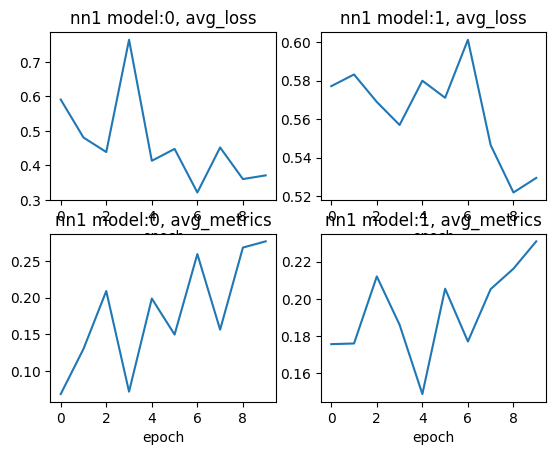

In [29]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())

fig, axs= plt.subplots(2,2)
for k,v in lgs2.last_train_nn1_progress.items():

    avg_loss = [ t['avg_loss'] for t in v['test_results']]
    avg_metrics = [ t['avg_metric'] for t in v['test_results']]
    axs[0,k].plot( avg_loss)
    axs[0,k].set_title(f"nn1 model:{k}, avg_loss")
    axs[0,k].set_xlabel("epoch")
    axs[1,k].plot(avg_metrics)
    axs[1,k].set_title(f"nn1 model:{k}, avg_metrics")
    axs[1,k].set_xlabel("epoch")

In [8]:
lgs2.last_train_nn2_progress

{'test_results': [{'avg_loss': 0.20155052468180656,
   'avg_metric': 0.945770263671875,
   'test_metrics': [0.945068359375,
    0.947509765625,
    0.949951171875,
    0.943603515625,
    0.948486328125,
    0.940673828125,
    0.94677734375,
    0.947265625,
    0.94580078125,
    0.94775390625,
    0.94482421875,
    0.938232421875,
    0.947021484375,
    0.952880859375,
    0.943359375,
    0.943115234375],
   'test_losses': [0.2057955116033554,
    0.19638840854167938,
    0.19136734306812286,
    0.21133917570114136,
    0.19474178552627563,
    0.21410338580608368,
    0.1979793757200241,
    0.19872739911079407,
    0.20343853533267975,
    0.19661389291286469,
    0.200296550989151,
    0.2263297438621521,
    0.19877862930297852,
    0.17063824832439423,
    0.2123221755027771,
    0.20594823360443115]},
  {'avg_loss': 0.1672117030248046,
   'avg_metric': 0.94525146484375,
   'test_metrics': [0.950439453125,
    0.943603515625,
    0.94677734375,
    0.94091796875,
    0.9475

Text(0.5, 0, 'epoch')

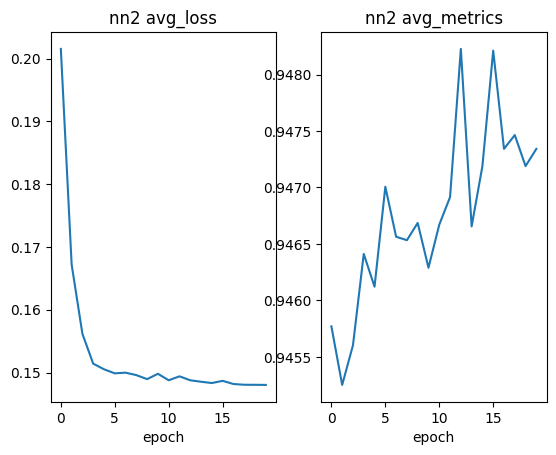

In [30]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())
fig, axs= plt.subplots(1,2)

v=lgs2.last_train_nn2_progress

avg_loss = [ t['avg_loss'] for t in v['test_results']]
avg_metrics = [ t['avg_metric'] for t in v['test_results']]
axs[0].plot( avg_loss)
axs[0].set_title(f"nn2 avg_loss")
axs[0].set_xlabel("epoch")
axs[1].plot(avg_metrics)
axs[1].set_title(f"nn2 avg_metrics")
axs[1].set_xlabel("epoch")

# Load model and predict

Recommended restart kernel

## setup

In [1]:
import numpy as np
import leopardgecko.segmentor2 as lgs2
import tifffile
import napari

In [2]:
#lgs2.load_lgsegm2_model("2024-06-19_0931_model.lgsegm2")
lgs2.load_lgsegm2_model("2024-06-20_1744_model.lgsegm2")

In [3]:
val_data = tifffile.imread("test_data\TS_0005_crop_val.tif")
val_labels_gnd = tifffile.imread("test_data\TS_0005_ribos_membr_crop_val.tif")

val_data_l = [val_data]

In [4]:
#Normalise
datavols_norm_list0 = lgs2.normalise_volumes(val_data_l)

In [5]:
# NV=napari.Viewer()
# NV.add_image(val_data)
# NV.add_image(datavols_norm_list0[0], name="normalized")
# NV.add_labels(val_labels_gnd, name="ground truth lbl")

OK

In [6]:
slice = datavols_norm_list0[0][128,:,:] #in case it is needed, and example slice

In [7]:
lgs2.torch_device_str_nn2 = "cuda:0"

Working through function by function in segmentor.py to find what is going wrong

## Check single slice prediction

In [8]:
lgs2.NN1_models[0]

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [9]:
lgs2.nn1_axes_to_models_indices

[0, 1, 1]

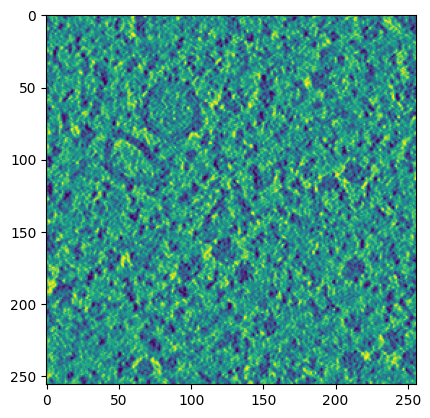

In [10]:
import matplotlib.pyplot as plt
plt.imshow(slice)

In [11]:
model = lgs2.NN1_models[0]
model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [12]:
import torch
import torch.nn
x = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(slice), dim=0) , dim=0).float().to("cuda:0")
X=model(x)
SM_func = torch.nn.Softmax(dim=1)
pred_probs_slice = SM_func(X)

In [13]:
pred_probs_slice.shape

torch.Size([1, 3, 256, 256])

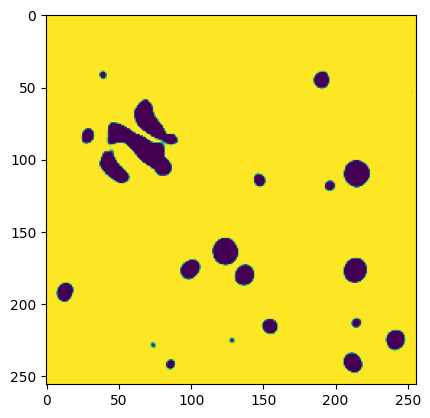

In [14]:
plt.imshow(pred_probs_slice.detach().cpu().numpy()[0,0,:,:])

OK

## Check nn1_predict_slices_along_axis_1

In [15]:
probs0, lbls0 = lgs2.predict_nn1_slices_along_axis_1(datavols_norm_list0[0], axis=0)

In [16]:
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_image(probs0, name="pred probs")

Assistant skips harvesting pyclesperanto as it's not installed.


<Image layer 'pred probs' at 0x1d3b9388c10>

OK

## Check NN1_predict

In [17]:
import tempfile
from pathlib import Path
tempdir_pred= tempfile.TemporaryDirectory()
path_out_results = Path(tempdir_pred.name)
path_out_results

WindowsPath('C:/Users/LUIS-W~1/AppData/Local/Temp/tmpp3gnjfrw')

In [18]:
res_pd = lgs2.predict_nn1(datavols_norm_list0, path_out_results)

Check results in temporary folder

In [19]:
# cleanup
del(tempdir_pred)

## Check full `predict()`

In [20]:
pred_res = lgs2.predict(val_data_l)

100%|██████████| 256/256 [02:46<00:00,  1.53it/s]


In [21]:
import napari
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_labels(val_labels_gnd, name="lbls gnd")
NV.add_labels(pred_res[0], name="pred lbls")

<Labels layer 'pred lbls' at 0x1d3d3d49b90>

OK